In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch 
from torch import nn
from torch.autograd import Variable

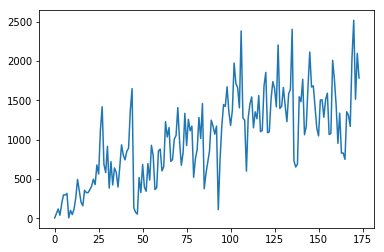

In [0]:
data_csv = pd.read_csv('fruits.csv',usecols=[1])
 
plt.plot(data_csv)
plt.show()
#数据预处理
data_csv = data_csv.dropna() #去掉na数据
dataset = data_csv.values
dataset = dataset.astype('float32')
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value-min_value
dataset = list(map(lambda x: x/scalar, dataset)) #将数据标准化到0~1之间

In [0]:
def create_dataset(dataset,look_back=3):
    dataX, dataY=[], []
    for i in range(len(dataset)-look_back):
        a=dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

data_X, data_Y = create_dataset(dataset)
#print(data_X)
#print(data_Y)

In [0]:
train_size = int(len(data_X) * 0.7)
test_size = len(data_X)-train_size
 
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
 
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]
 
train_X = train_X.reshape(-1,1,3)
train_Y = train_Y.reshape(-1,1,1)
  
test_X = test_X.reshape(-1,1,3)

train_x = torch.from_numpy(train_X)

train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

In [0]:
class lstm_reg(nn.Module):
    def __init__(self,input_size,hidden_size, output_size=1,num_layers=2):
        super(lstm_reg,self).__init__()
 
        self.rnn = nn.LSTM(input_size,hidden_size,num_layers)
        self.reg = nn.Linear(hidden_size,output_size)
 
    def forward(self,x):
        x, _ = self.rnn(x)
        s,b,h = x.shape
        x = x.view(s*b, h)
        x = self.reg(x)
        x = x.view(s,b,-1)
        return x

In [0]:
net = lstm_reg(3, 5)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

In [0]:
for e in range(1000):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    out = net(var_x)
    loss = criterion(out, var_y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 100 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.data))

Epoch: 100, Loss: 0.01778
Epoch: 200, Loss: 0.01457
Epoch: 300, Loss: 0.01452
Epoch: 400, Loss: 0.01364
Epoch: 500, Loss: 0.01558
Epoch: 600, Loss: 0.01264
Epoch: 700, Loss: 0.01051
Epoch: 800, Loss: 0.00978
Epoch: 900, Loss: 0.01255
Epoch: 1000, Loss: 0.00679


In [0]:
net = net.eval() # 转换成测试模式

In [0]:
data_X = data_X.reshape(-1, 1, 3)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net(var_data) # 测试集的预测结果

In [0]:
# 改变输出的格式
pred_test = pred_test.view(-1).data.numpy()

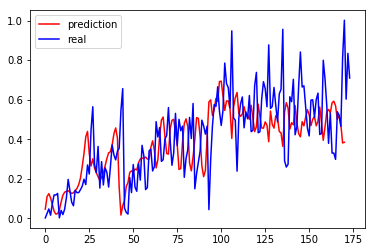

In [0]:
# 画出实际结果和预测的结果
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')

In [0]:
print(pred_test*scalar)

[ 116.21848   274.77798   313.42825   259.94803   176.21036    91.372
   52.818665   59.105854  107.05149   206.34286   292.83267   331.70306
  344.4948    350.63193   333.15445   317.61887   323.3702    353.9679
  380.08133   430.1196    512.4807    659.22345   826.4893   1036.3163
 1105.5957    823.1157    664.60956   757.60547   637.19476   579.7463
  529.28674   479.8042    520.7804    573.5799    668.4481    760.31055
  832.4448    846.9773    931.6285   1074.7604   1150.2188   1021.3667
  392.14124    40.689117  160.09659   221.8201    402.21118   454.9618
  582.86993   603.2075    586.5829    626.96356   614.7105    706.3648
  754.8686    765.3839    760.5713    779.7398    753.3337    754.75946
  901.5345    985.8716    866.0951    640.90485   746.2855   1047.6442
 1249.6255   1288.8473   1044.0549    824.287     816.21265  1138.4099
 1247.3271   1259.4049   1086.5907    934.7931    620.4884    633.29675
  968.6488   1206.621    1265.0315   1168.0359    704.9855    603.21606
  